## Задание

Необходимо проанализировать датасет от химиков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('../Data/Raw/info.xlsx', index_col=0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [3]:
df.shape

(1001, 213)

In [32]:
for i in df.columns:
    print(i)

IC50, mM
CC50, mM
SI
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA

In [33]:
df.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


## Что известно о данных

1. **Фармакологические параметры**  
   - `IC50, mM` – Концентрация соединения, необходимая для ингибирования биологической активности на 50% (мера эффективности).  
   - `CC50, mM` – Цитотоксическая концентрация, вызывающая гибель 50% клеток (мера токсичности).  
   - `SI (Selectivity Index)` – Индекс селективности (`SI = CC50 / IC50`), показывает, насколько соединение избирательно действует на мишень, а не на здоровые клетки.  

2. **Физико-химические свойства**  
   - `MolWt`, `ExactMolWt` – Молекулярная масса (примерная и точная).  
   - `HeavyAtomCount` – Число "тяжёлых" атомов (не водород).  
   - `NumHAcceptors`, `NumHDonors` – Число акцепторов и доноров водородных связей (важно для растворимости).  
   - `TPSA` (Topological Polar Surface Area) – Полярная площадь поверхности, влияет на проницаемость через мембраны.  
   - `LogP` (`MolLogP`) – Коэффициент распределения октанол/вода (мера гидрофобности).  

3. **Электронные и стерические дескрипторы**  
   - `EState` (Electrotopological State) – Индексы, описывающие электронное окружение атомов.  
   - `BCUT2D_*` – Дескрипторы, учитывающие атомные массы, заряды и поляризуемость.  
   - `Chi*`, `Kappa*` – Топологические индексы (например, связность молекулы).  

4. **Функциональные группы (фрагменты)**  
   Признаки вида `fr_*` (например, `fr_amide`, `fr_halogen`) указывают на наличие специфических химических групп в молекуле.  

5. **Квантово-химические параметры**  
   - `PartialCharge` – Частичные заряды на атомах.  
   - `Ipc` – Информационный индекс поляризуемости.  

6. **Структурная сложность**  
   - `RingCount` – Число циклов в молекуле.  
   - `NumRotatableBonds` – Число вращающихся связей (гибкость молекулы).  

## Найдем пропуски и заполним медианным значением

In [3]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


In [4]:
missing_values_cols = ['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI',
                       'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
                       'BCUT2D_MRLOW']

for col in missing_values_cols:
    median_val = df[col].median()
    df.loc[:, col] = df[col].fillna(median_val) 

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## Физико-химические свойства

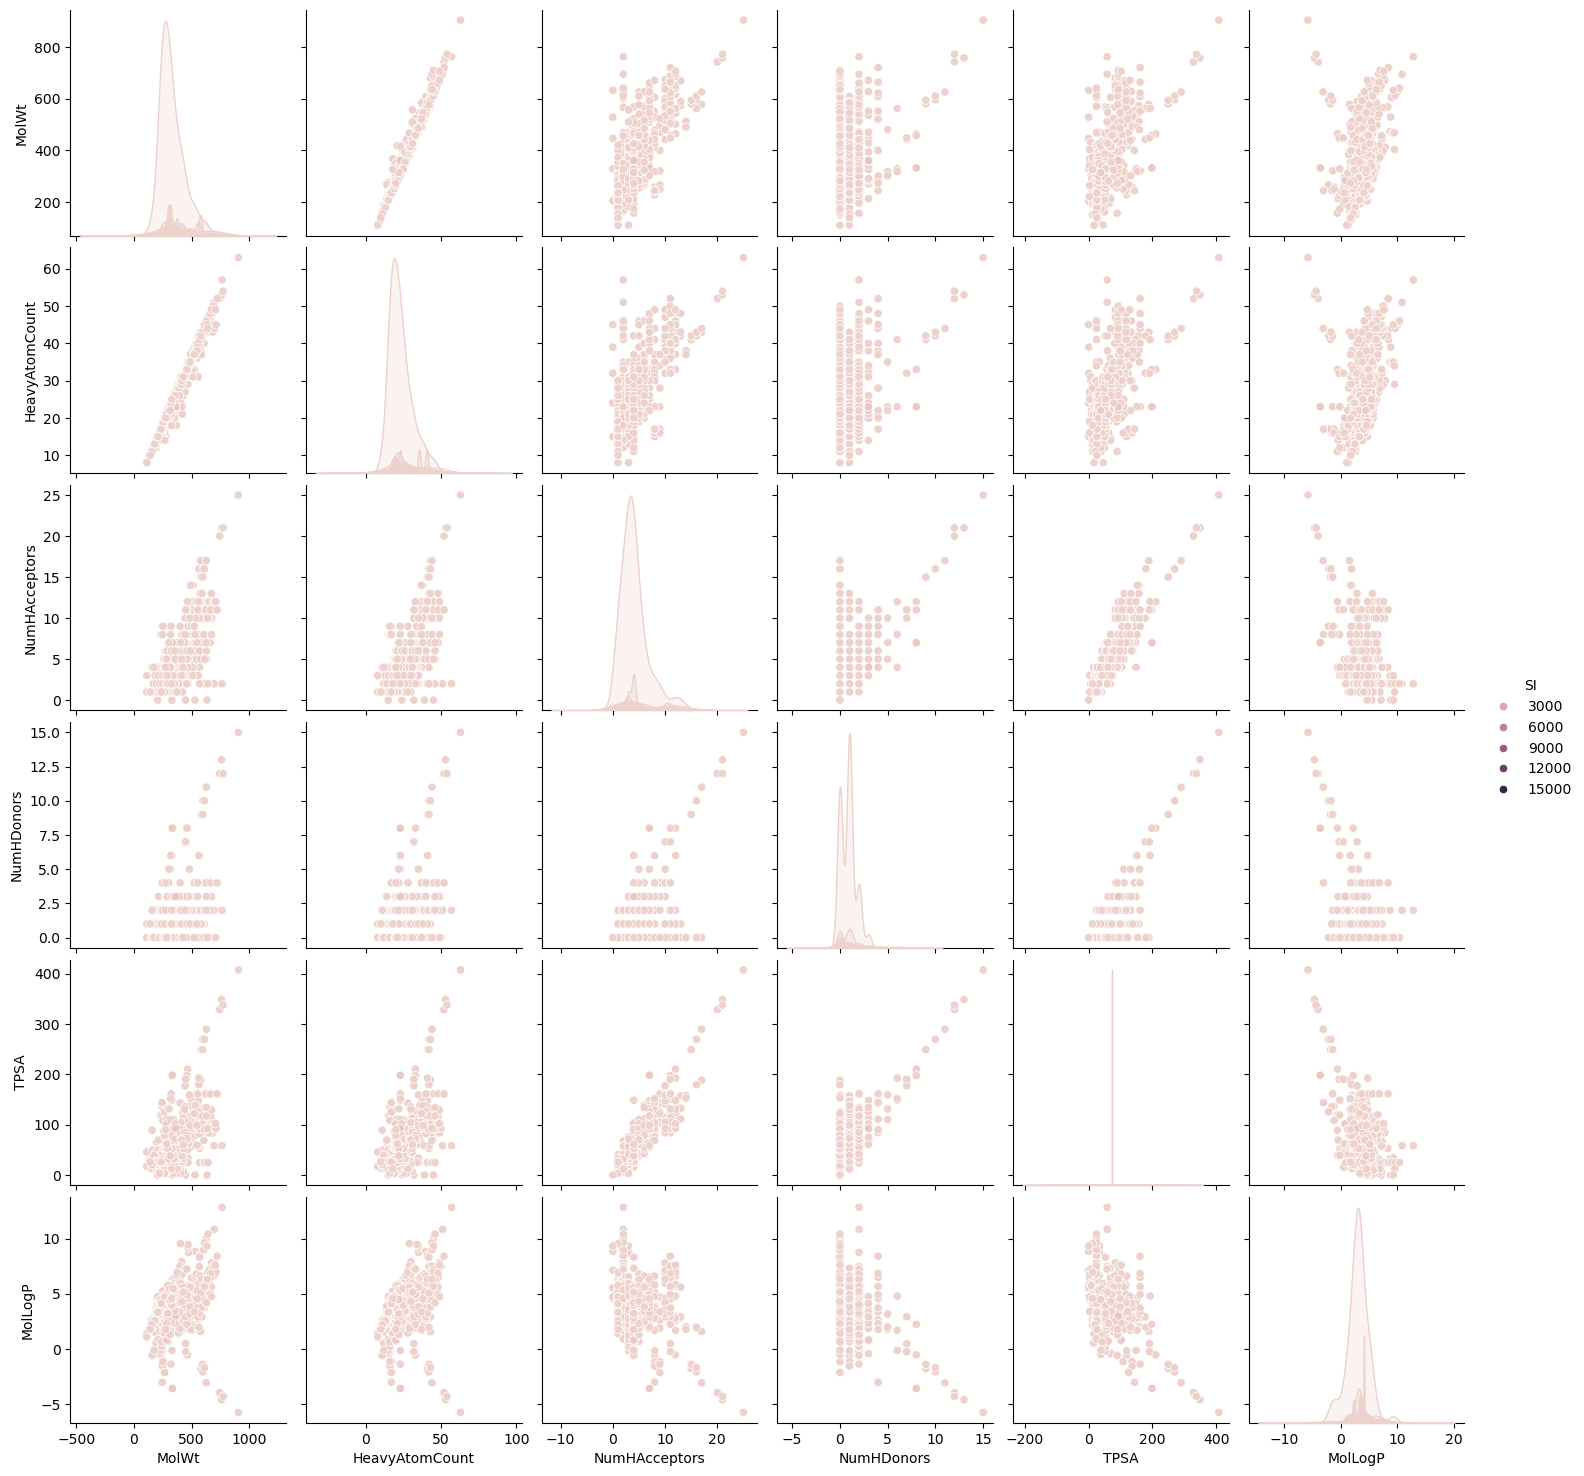

In [36]:
props = ['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'TPSA', 'MolLogP']
sns.pairplot(df[props + ['SI']], hue='SI', diag_kind='kde')
plt.show()

## Электронные и стерические дескрипторы

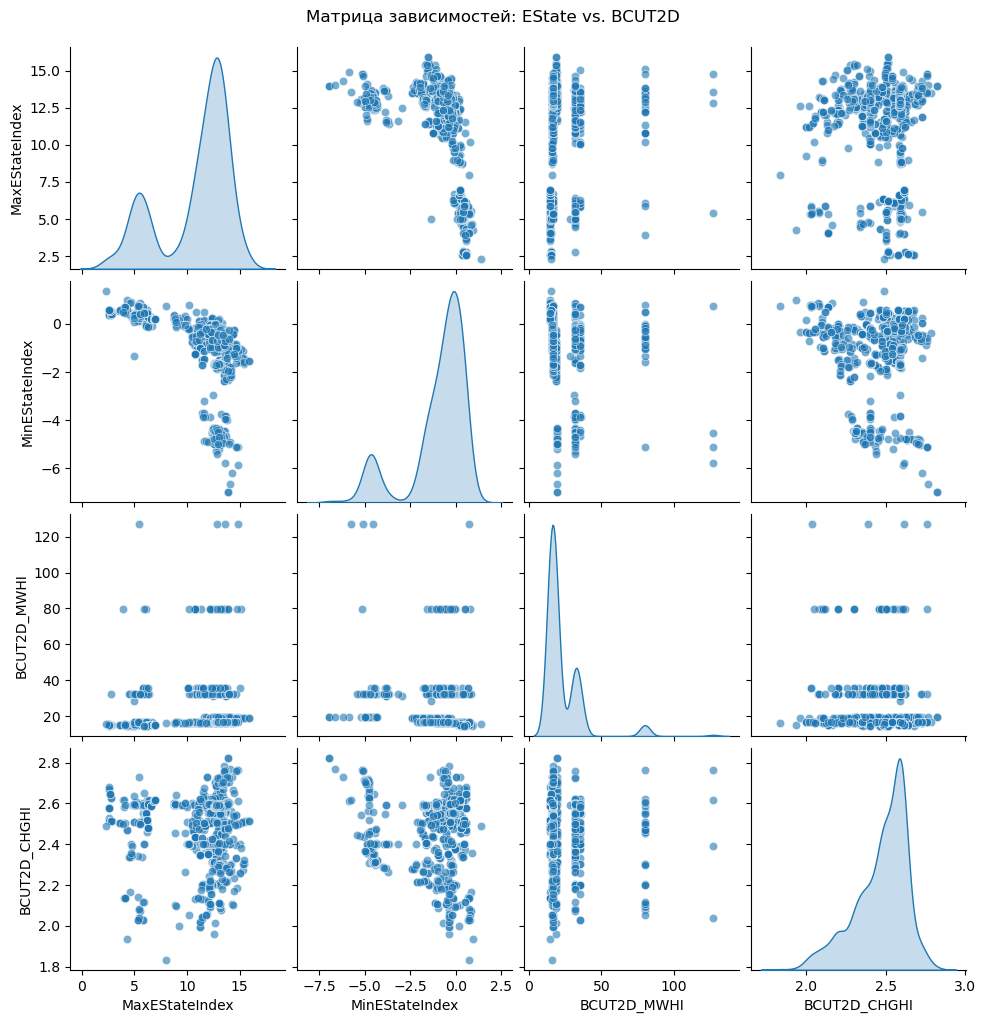

In [48]:
# Выбираем подмножество признаков
subset = df[['MaxEStateIndex', 'MinEStateIndex', 'BCUT2D_MWHI', 'BCUT2D_CHGHI']]

# Построение матрицы
sns.pairplot(subset, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Матрица зависимостей: EState vs. BCUT2D', y=1.02)
plt.show()

## Топ-10 самых распространённых функциональных групп (fr_*)

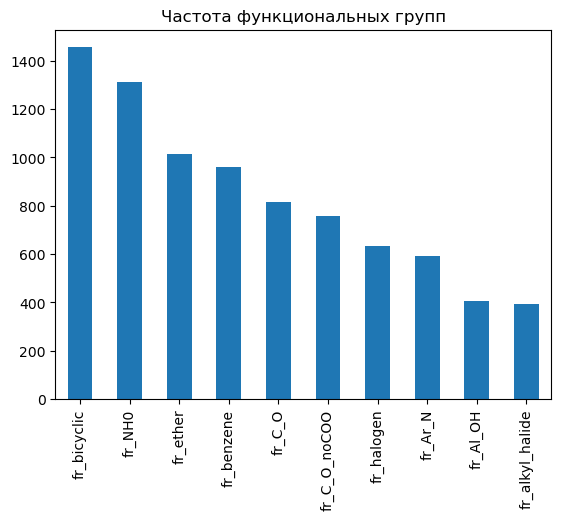

In [37]:
fr_columns = [col for col in df.columns if col.startswith('fr_')]
fr_counts = df[fr_columns].sum().sort_values(ascending=False)
fr_counts.head(10).plot(kind='bar', title='Частота функциональных групп')
plt.show()

## Анализ целевых переменных

In [37]:
def show_distribution():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df['IC50, mM'], kde=True, bins=30)
    plt.title('Распределение IC50')
    
    plt.subplot(1, 3, 2)
    sns.histplot(df['CC50, mM'], kde=True, bins=30)
    plt.title('Распределение CC50')
    
    plt.subplot(1, 3, 3)
    sns.histplot(df['SI'], kde=True, bins=30)
    plt.title('Распределение SI')
    plt.tight_layout()
    plt.show()
    
    # Ящики с усами (Boxplot)
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[['IC50, mM', 'CC50, mM', 'SI']])
    plt.yscale('log')
    plt.title('Распределение ключевых параметров (логарифм)')
    plt.show()

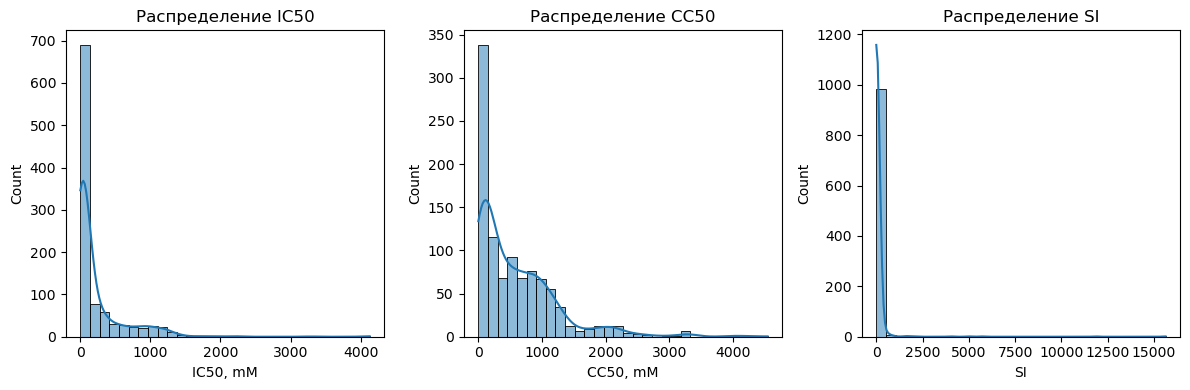

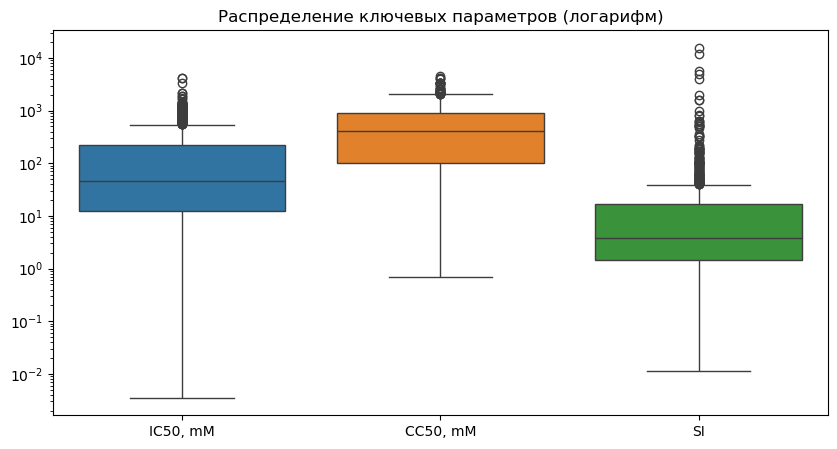

In [38]:
show_distribution()

## Поиск и удаление выбросов для целевых переменных

**При удалении выборосов ухудшаются метрики для задачи регрессии.**

In [8]:
# def get_IQR(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = df[(series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))]
#     df_cleaned = df.drop(outliers.index, inplace=True)
#     print(f"Выбросы: {len(outliers)} / {len(df)}") 
#     return df_cleaned

In [9]:
# Метод IQR для IC50
# get_IQR(df['IC50, mM'])

Выбросы: 147 / 854


In [10]:
# Метод IQR для SI
# get_IQR(df['SI'])

Выбросы: 101 / 753


In [11]:
# Метод IQR для CC50, mM
# get_IQR(df['CC50, mM'])

Выбросы: 31 / 722


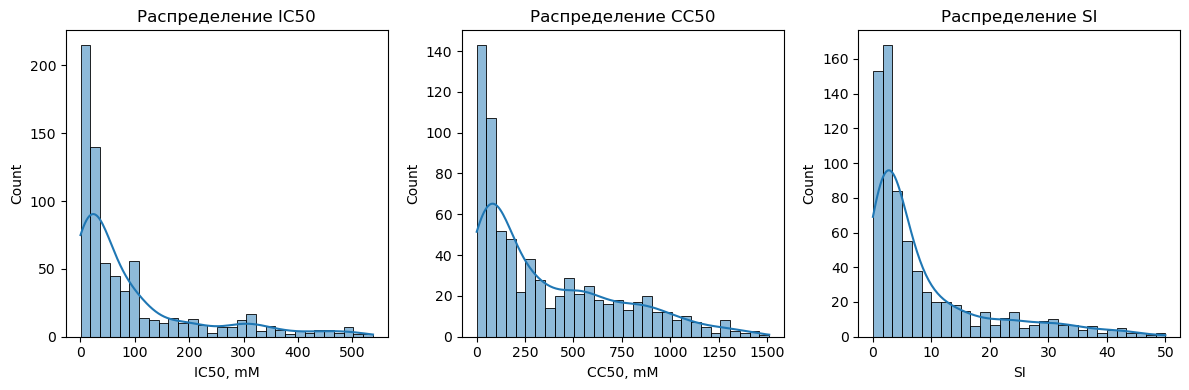

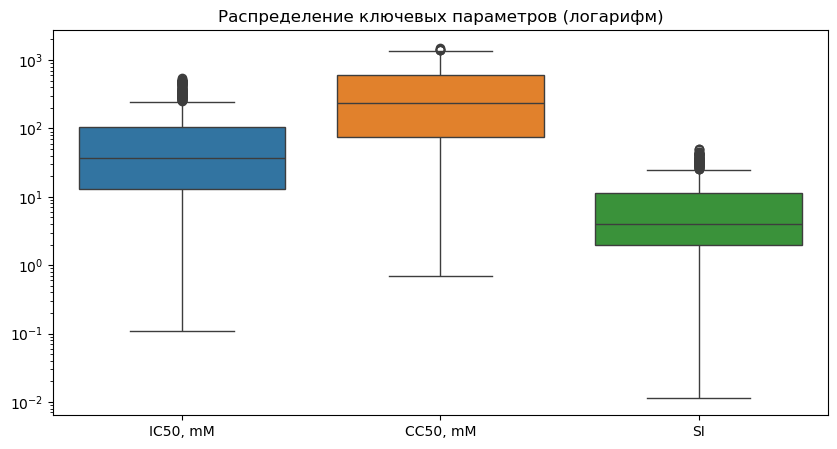

In [43]:
# show_distribution()

## Удалим константные признаки (или почти константные) с помощью Variance Threshold

Этот метод относится к фильтрационным методам и используется для удаления малоинформативных признаков на основе их вариативности.

**Значения дисперсии**
* Дисперсия = 1: Признак имеет исходную вариативность (после масштабирования).
* Дисперсия ≈ 0: Признак почти не изменяется (константный или почти константный).
* Дисперсия > 1: Признак имеет большую вариативность, чем средняя по датасету.

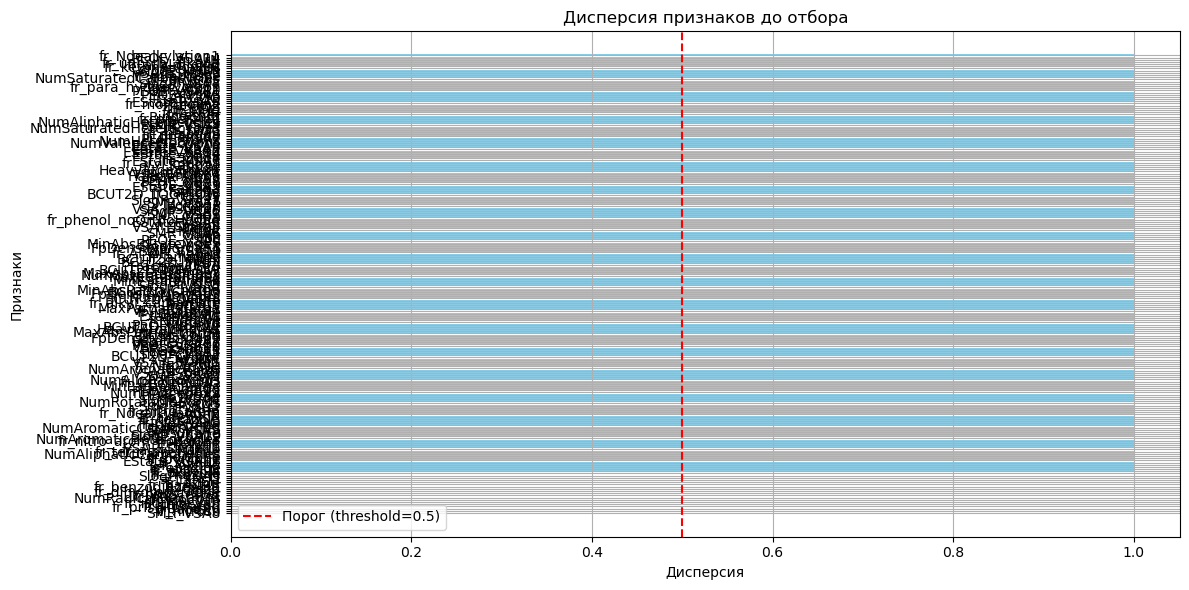

Удаленные признаки: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


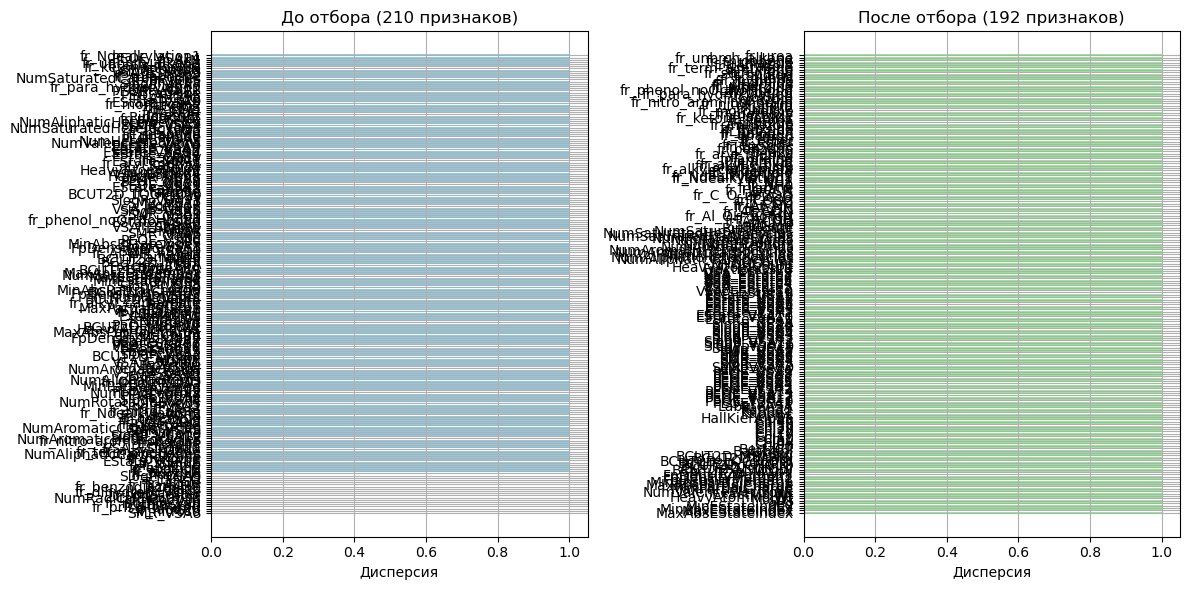

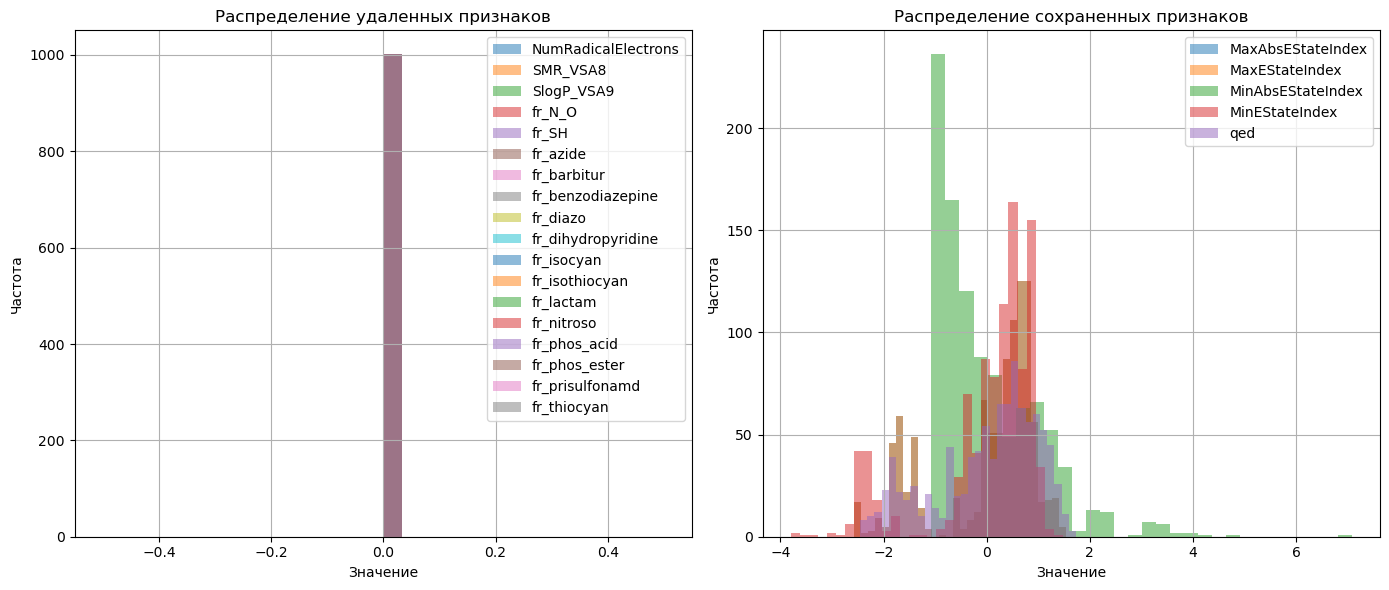

In [5]:
X = df.drop(['IC50, mM', 'CC50, mM', 'SI'], axis=1)  # Оставляем целевые переменные

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Расчет дисперсии для каждого признака
variances = X_scaled.var().sort_values()

# Визуализация дисперсии признаков
plt.figure(figsize=(12, 6))
bars = plt.barh(variances.index, variances.values, color='skyblue')

# Подсветка признаков с низкой дисперсией
threshold = 0.5
for i, (name, var) in enumerate(variances.items()):
    if var < threshold:
        bars[i].set_color('salmon')

plt.axvline(x=threshold, color='red', linestyle='--', label=f'Порог (threshold={threshold})')
plt.title('Дисперсия признаков до отбора')
plt.xlabel('Дисперсия')
plt.ylabel('Признаки')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

selector = VarianceThreshold(threshold=threshold)
X_filtered = selector.fit_transform(X_scaled)

# Получаем имена сохраненных признаков
selected_features = X_scaled.columns[selector.get_support()]
dropped_features = [f for f in X_scaled.columns if f not in selected_features]

print("Удаленные признаки:", dropped_features)

# Визуализация результатов отбора
plt.figure(figsize=(12, 6))

# До отбора
plt.subplot(1, 2, 1)
plt.barh(variances.index, variances.values, color='skyblue')
plt.title(f'До отбора ({X_scaled.shape[1]} признаков)')
plt.xlabel('Дисперсия')
plt.grid(True)

# После отбора
plt.subplot(1, 2, 2)
selected_variances = variances[selected_features]
plt.barh(selected_variances.index, selected_variances.values, color='lightgreen')
plt.title(f'После отбора ({len(selected_features)} признаков)')
plt.xlabel('Дисперсия')
plt.grid(True)

plt.tight_layout()
plt.show()

# Сравнение распределений удаленных и сохраненных признаков
plt.figure(figsize=(14, 6))

# Распределение удаленных признаков
plt.subplot(1, 2, 1)
for feature in dropped_features:
    plt.hist(X_scaled[feature], bins=30, alpha=0.5, label=feature)
plt.title('Распределение удаленных признаков')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)

# Распределение сохраненных признаков
plt.subplot(1, 2, 2)
for feature in selected_features[:5]:  # Покажем первые 5 для наглядности
    plt.hist(X_scaled[feature], bins=30, alpha=0.5, label=feature)
plt.title('Распределение сохраненных признаков')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Корреляционный анализ

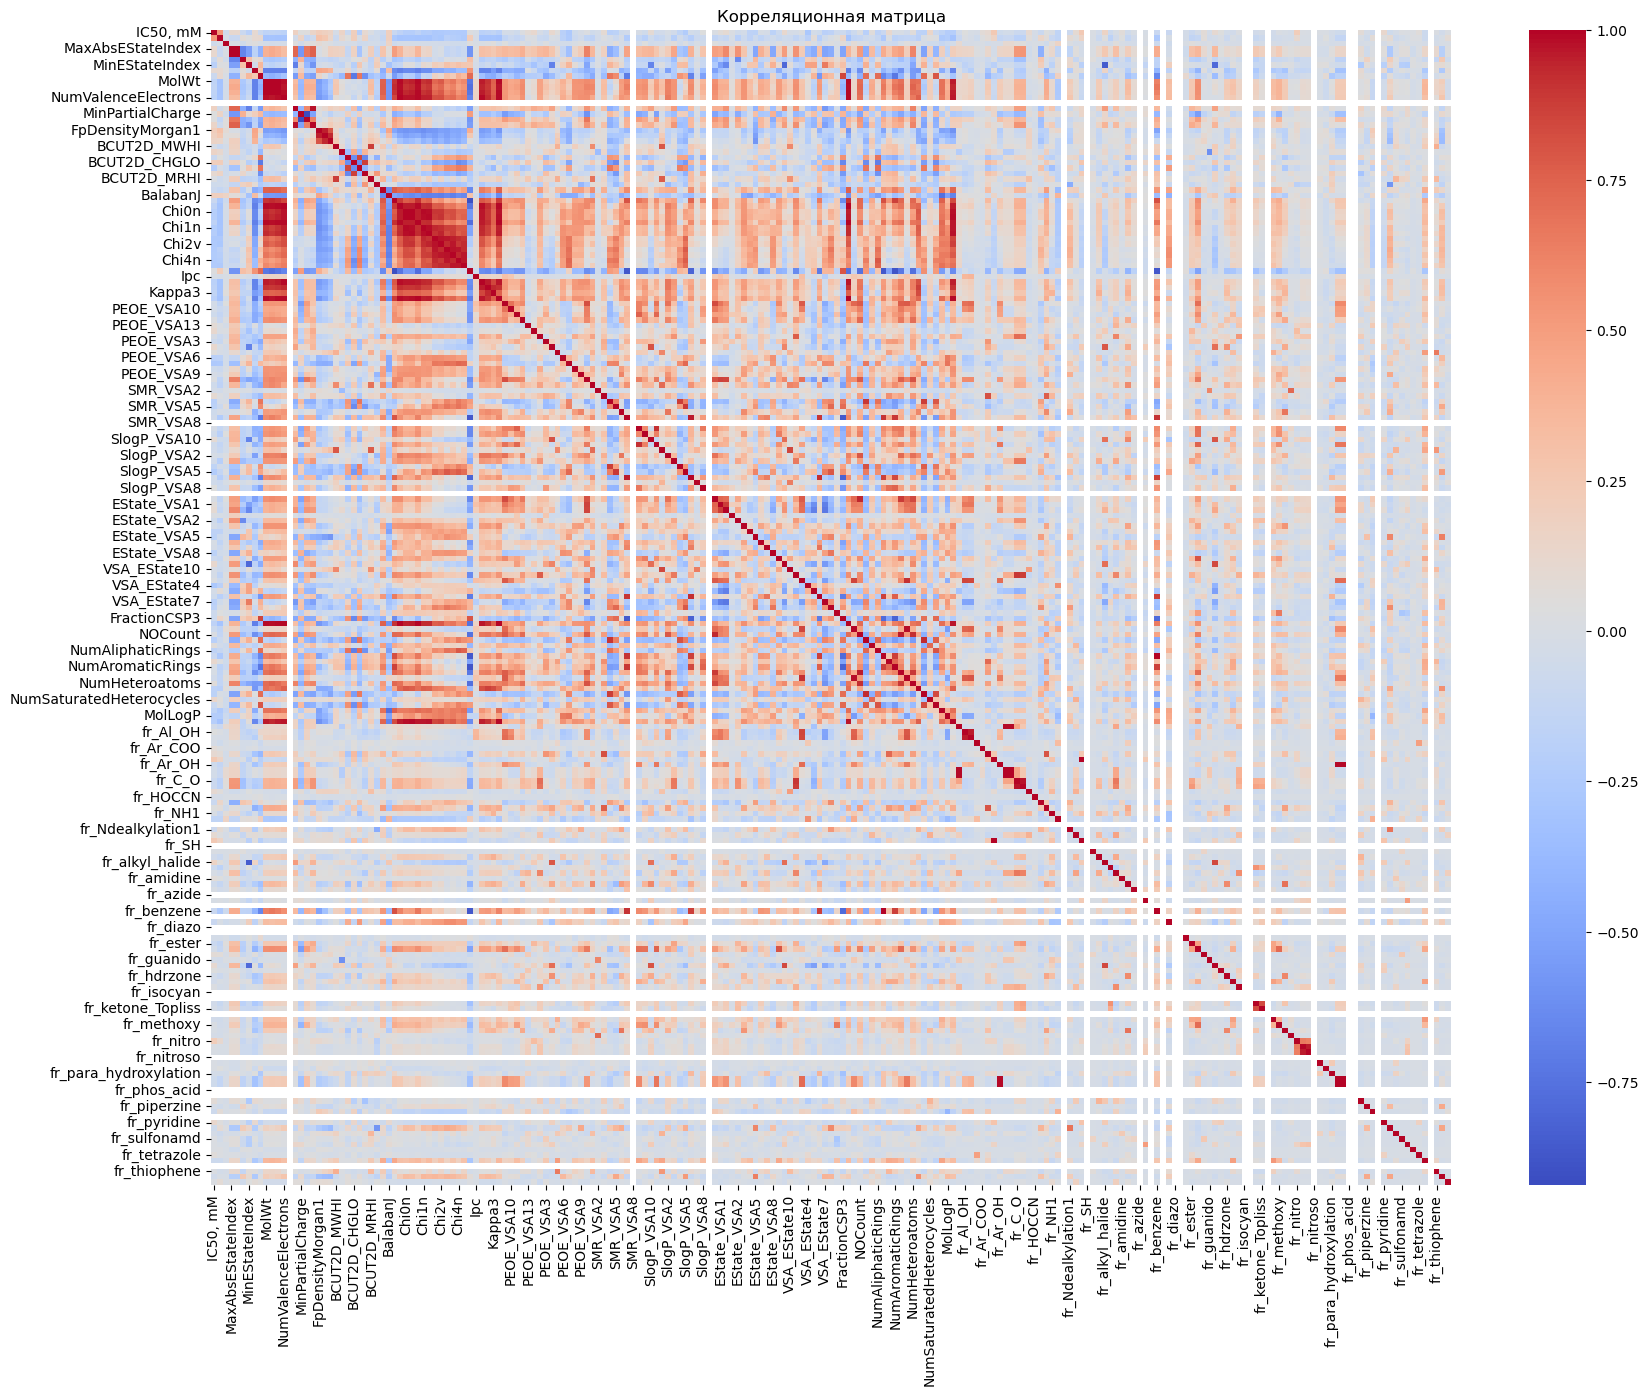

In [33]:
corr_matrix = df.corr(numeric_only=True)

# Тепловая карта для ключевых признаков
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [8]:
# Расчет корреляционной матрицы
corr_matrix = df[selected_features.tolist()].corr().abs()

# Верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Поиск признаков с корреляцией > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(f"Удаленные признаки: {to_drop}")

# Удаление
df_filtered = df[selected_features.tolist()].drop(columns=to_drop)

Удаленные признаки: ['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'SMR_VSA7', 'SlogP_VSA11', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'EState_VSA1', 'EState_VSA10', 'VSA_EState6', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAromaticCarbocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'MolMR', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_Nhpyrrole', 'fr_benzene', 'fr_nitro_arom_nonortho', 'fr_phenol', 'fr_phenol_noOrthoHbond']


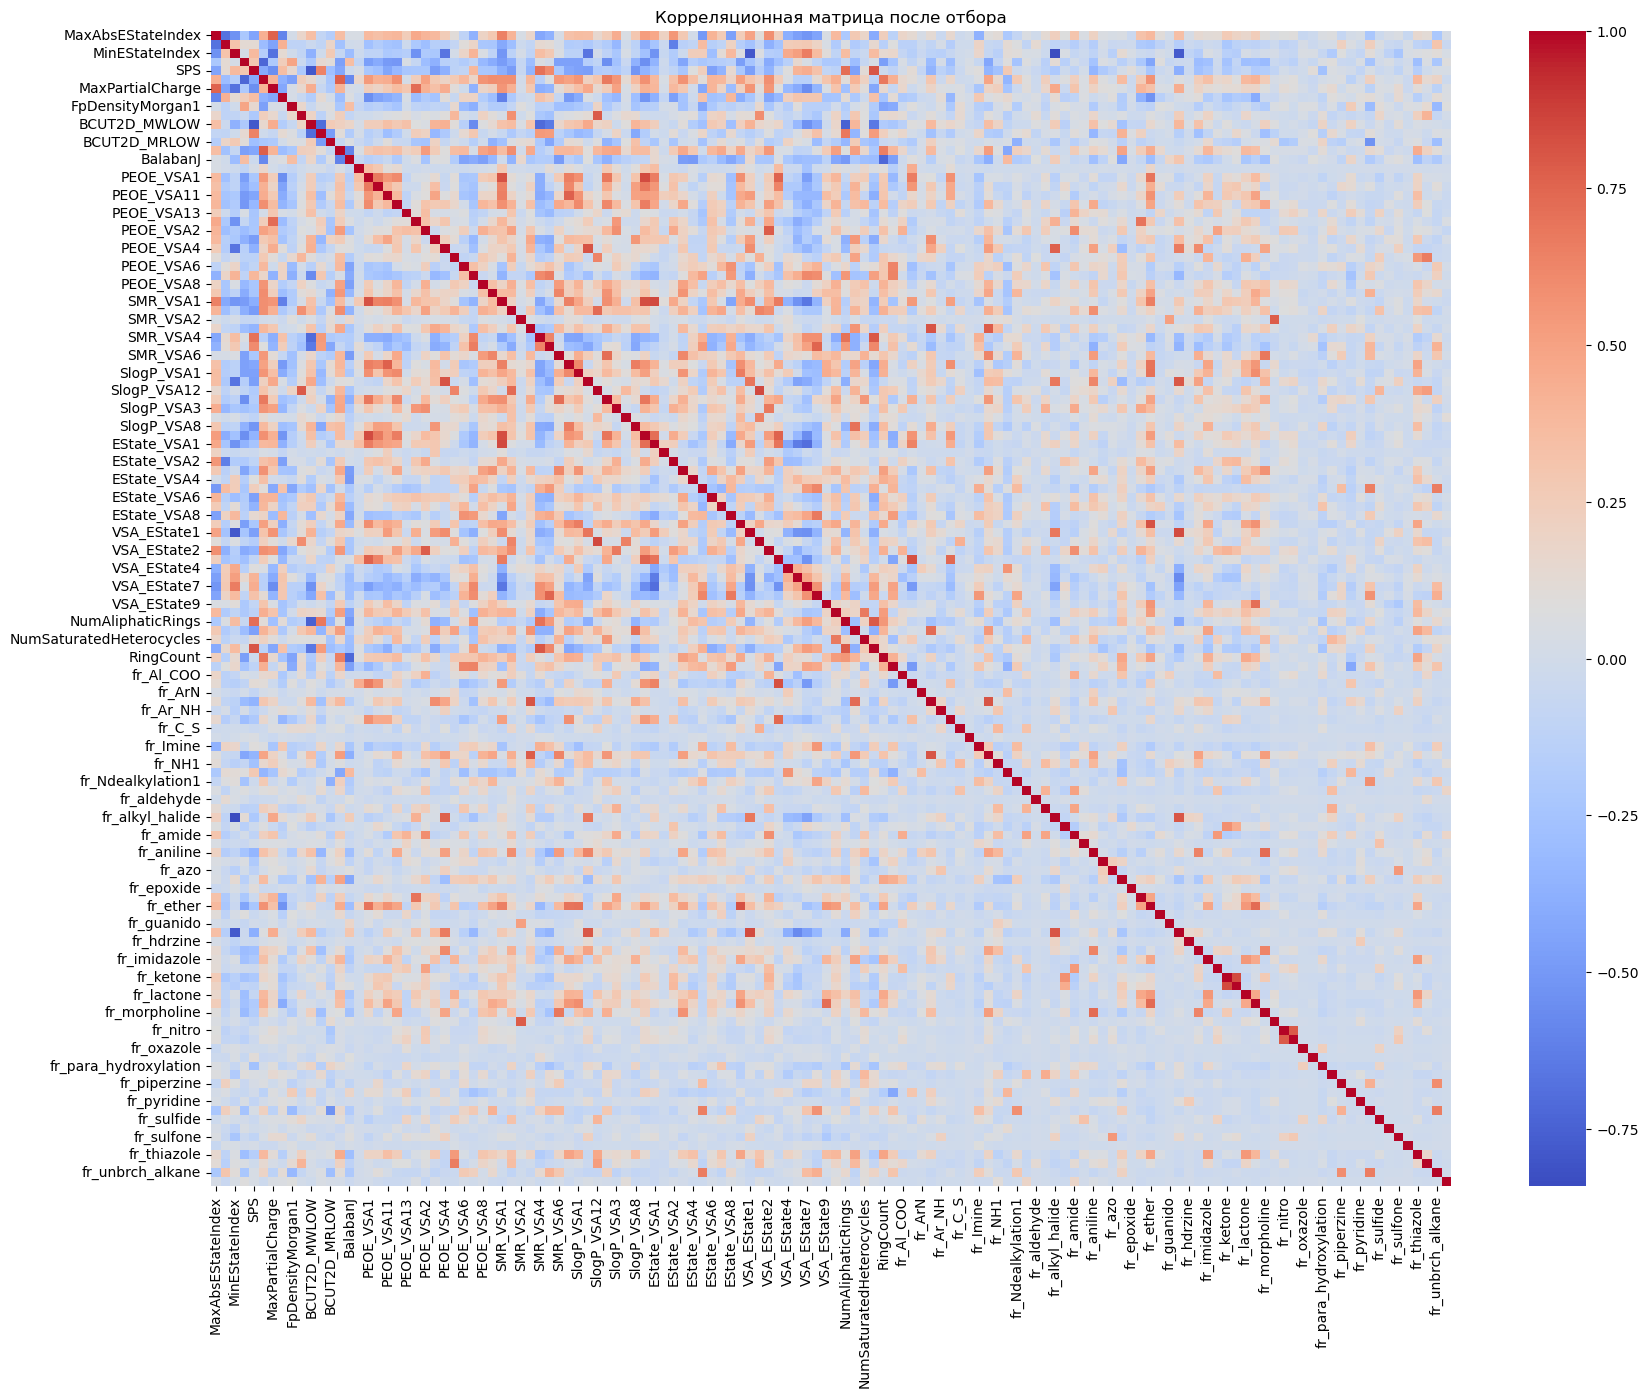

In [14]:
corr_matrix = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Корреляционная матрица после отбора')
plt.show()

## Сохраняем результат обработки в файл

In [35]:
df_filtered['IC50, mM'] = df['IC50, mM']
df_filtered['CC50, mM'] = df['CC50, mM']
df_filtered['SI'] = df['SI']

In [40]:
# Итоговая размерность
df_filtered.shape

(1001, 134)

In [41]:
df_filtered.to_excel("../Data/Processed/processed_info.xlsx", index=False)

In [42]:
df1 = pd.read_excel('../Data/Processed/processed_info.xlsx')
df1.shape

(1001, 134)

In [43]:
missing_values = df1.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## Итоги
* В ходе анализа было выявлено, что датасет имеет незначительное количество пропусков. Они заменены медианными значениями.
* Проанализированы распределения целевых переменных. Они не является нормальными.
* Удалены:
    * выбросы в целевых переменных;
    * сильно коррелирующие значения (> 0.85);
    * константные признаки с помощью Variance Threshold.
* Рассмотрены физико-химические свойства, электронные и стерические дескрипторы.
* Визуализирован топ-10 самых распространённых функциональных групп (fr_*).
* Результаты сохранены в xlsx файл.

Таким образом, проведён и описан анализ представленных данных, включая статистические методым (метод describe и корреляционный анализ); удалены выбросы и нерелевантные признаки; выявлены закономерности, способствующие упрощению задачи.